# ORIE 4580/5580 Assignment 6

#### Students: Connor Drought (cpd53) and Jackie Lasseter (jl2638)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

All first drafts of code were found using Chat-GPT

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
!pip install scipy
from scipy.integrate import quad

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

P(X > 250) = 1 - P(X $\leq$ 250)

$ \lambda(t) = \int_{0}^{12} \frac{1}{56}(5t^3 - 90t^2 + 300t + 1480) \, dt $


In [ ]:
from scipy import integrate
from scipy.stats import poisson

# Define the rate function
def lambda_t(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

# Integrate the rate function to get the lambda value
lambda_value, _ = integrate.quad(lambda_t, 0, 12)

# Define the Poisson distribution with the calculated lambda
poisson_dist = poisson(mu=lambda_value)

# Calculate the probability P(X > 250)
probability_less_than_250 = poisson_dist.cdf(250)
probability_more_than_250 = 1 - probability_less_than_250

print(f"Calculated lambda value: {lambda_value:.4f}")
print(f"Probability of more than 250 customers: {probability_more_than_250:.4f}")

Calculated lambda value: 240.0000
Probability of more than 250 customers: 0.2471


___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [16]:
#THIS WAS FOUND USING CHAT-GPT

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def time_dependent_rate(t):
    return 1 / 56 * (5 * t**3 - 90 * t**2 + 300 * t + 1480)

def simulate_time_dependent_poisson_process(total_time, lambda_max):
    event_times = []
    current_time = 0
    while current_time < total_time:
        rate = time_dependent_rate(current_time)
        time_to_next_event = np.random.exponential(1 / lambda_max)
        current_time += time_to_next_event
        if np.random.rand() <= rate / lambda_max:
            event_times.append(current_time)

    return event_times

def count_events_above_threshold(replications, threshold):
    count = 0
    for events in replications:
        if len(events) > threshold:
            count += 1
    return count

total_simulation_time = 12
num_simulations = 500
customer_threshold = 250

# Find the maximum rate of the time-dependent Poisson process
objective_function = lambda t: -time_dependent_rate(t)
result = minimize_scalar(objective_function, bounds=(0, total_simulation_time), method='bounded')
lambda_max = -result.fun

all_customer_arrival_times = []

# Simulate the time-dependent Poisson process for each replication
for _ in range(num_simulations):
    customer_arrival_times = simulate_time_dependent_poisson_process(total_simulation_time, lambda_max)
    all_customer_arrival_times.append(customer_arrival_times)

# Count the number of replications where the number of customers exceeds the threshold
count_exceed_threshold = count_events_above_threshold(all_customer_arrival_times, customer_threshold)

# Estimate the probability and calculate the 95% confidence interval
probability_estimate = count_exceed_threshold / num_simulations
confidence_interval = (
    probability_estimate - 1.96 * np.sqrt((probability_estimate * (1 - probability_estimate)) / num_simulations),
    probability_estimate + 1.96 * np.sqrt((probability_estimate * (1 - probability_estimate)) / num_simulations)
)

print(f"Estimated Probability of more than {customer_threshold} customers: {probability_estimate:.5f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.5f})")


Estimated Probability of more than 250 customers: 0.25200
95% Confidence Interval: (0.2139, 0.29006)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

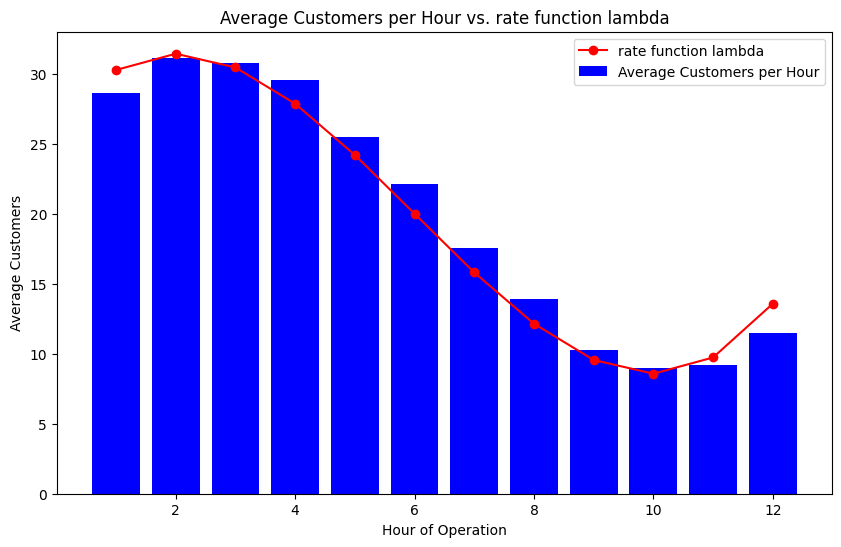

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Poisson arrival rate at time t
def poisson_arrival_rate(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

# Parameters for the simulation
n_replications = 500  # Number of replications
n_hours = 12

# Lists to store the average number of customers for each hour
average_customers_per_hour = [0] * n_hours

# Simulate the process for each replication
for _ in range(n_replications):
    customers_per_hour = np.zeros(n_hours)
    for hour in range(n_hours):
        t_start = hour
        t_end = hour + 1
        lambda_t = poisson_arrival_rate(np.random.uniform(t_start, t_end))
        arrivals = np.random.poisson(lambda_t)
        customers_per_hour[hour] = arrivals
    average_customers_per_hour = np.add(average_customers_per_hour, customers_per_hour)

# Calculate the average number of customers per hour
average_customers_per_hour /= n_replications

# Create an array of hours for the x-axis of the plot
hours = list(range(1, n_hours + 1))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hours, average_customers_per_hour, color='blue', label='Average Customers per Hour')
plt.plot(hours, [poisson_arrival_rate(t) for t in hours], color='red', marker='o', linestyle='-', label='rate function lambda')
plt.xlabel('Hour of Operation')
plt.ylabel('Average Customers')
plt.title('Average Customers per Hour vs. rate function lambda')
plt.legend()
plt.show()





---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


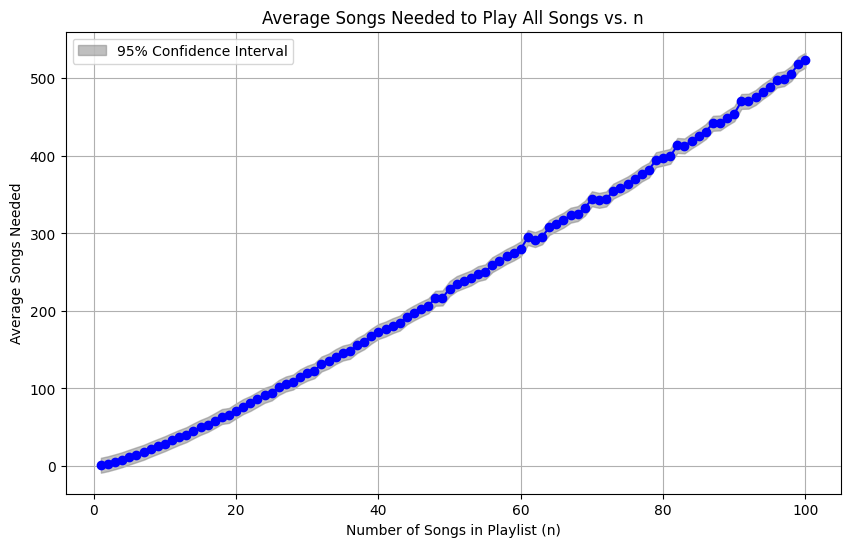

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate playing songs until all songs have been played at least once
def simulate_playlist(n_songs):
    playlist = set(range(n_songs))
    songs_played = set()
    songs_needed = 0
    while len(songs_played) < n_songs:
        song = random.randint(0, n_songs - 1)
        songs_played.add(song)
        songs_needed += 1
    return songs_needed

# Parameters for the simulation
n_simulations = 1000
n_values = list(range(1, 101))  # Simulate for n from 1 to 100
average_songs_needed = []

# Simulate for different values of n
for n in n_values:
    songs_needed_per_simulation = []
    for _ in range(n_simulations):
        songs_needed = simulate_playlist(n)
        songs_needed_per_simulation.append(songs_needed)
    average_songs_needed.append(np.mean(songs_needed_per_simulation))

# Create a plot to estimate the relationship
plt.figure(figsize=(10, 6))
plt.plot(n_values, average_songs_needed, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Songs in Playlist (n)')
plt.ylabel('Average Songs Needed')
plt.title('Average Songs Needed to Play All Songs vs. n')
plt.grid(True)

# Calculate confidence intervals for the data
confidence_interval = 1.96 * np.std(average_songs_needed) / np.sqrt(n_simulations)
lower_bound = np.array(average_songs_needed) - confidence_interval
upper_bound = np.array(average_songs_needed) + confidence_interval

# Display the confidence intervals
plt.fill_between(n_values, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Confidence Interval')

plt.legend()
plt.show()


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



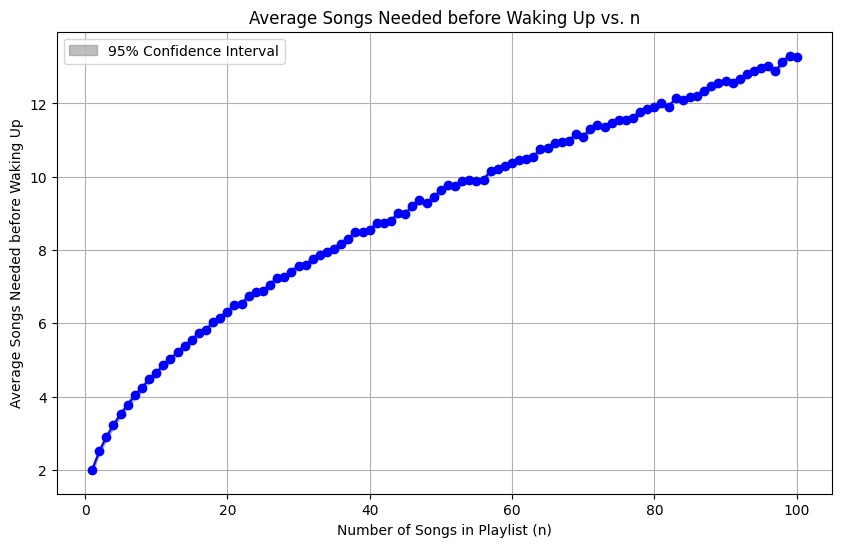

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate playing songs until a previously played song is heard
def simulate_playlist_wake_up(n_songs):
    playlist = set(range(n_songs))
    songs_played = set()
    songs_needed = 0
    while True:
        song = random.randint(0, n_songs - 1)
        songs_needed += 1
        if song in songs_played:
            break
        songs_played.add(song)
    return songs_needed

# Parameters for the simulation
n_simulations = 5000
n_values = list(range(1, 101))  # Simulate for n from 1 to 100
average_songs_needed = []

# Simulate for different values of n
for n in n_values:
    songs_needed_per_simulation = []
    for _ in range(n_simulations):
        songs_needed = simulate_playlist_wake_up(n)
        songs_needed_per_simulation.append(songs_needed)
    average_songs_needed.append(np.mean(songs_needed_per_simulation))

# Create a plot to estimate the relationship
plt.figure(figsize=(10, 6))
plt.plot(n_values, average_songs_needed, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Songs in Playlist (n)')
plt.ylabel('Average Songs Needed before Waking Up')
plt.title('Average Songs Needed before Waking Up vs. n')
plt.grid(True)

# Calculate confidence intervals for the data
confidence_interval = 1.96 * np.std(average_songs_needed) / np.sqrt(n_simulations)
lower_bound = np.array(average_songs_needed) - confidence_interval
upper_bound = np.array(average_songs_needed) + confidence_interval

# Display the confidence intervals
plt.fill_between(n_values, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Confidence Interval')

plt.legend()
plt.show()


___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

<function matplotlib.pyplot.show(close=None, block=None)>

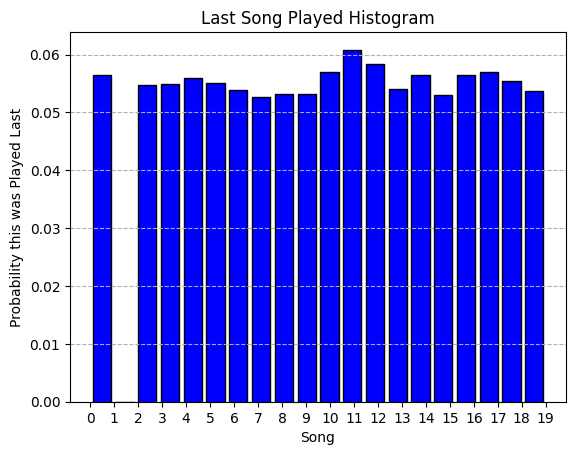

In [ ]:
import random
import matplotlib.pyplot as plt

n = 20
replications = 10000

last_song = np.zeros(replications)

for i in range(replications):
  played = np.zeros(n)
  j = 1
  played[j] = 1
  while(sum(played) != n):
    j = int((j + 2*(random.randint(0,1) - 0.5)) %n)
    played[j] = 1
  last_song[i] = j

plt.hist(last_song, bins = 20, density=True, rwidth=0.8, color = 'blue', edgecolor='black')
plt.xticks(range(0,20))
plt.xlabel('Song')
plt.ylabel('Probability this was Played Last')
plt.title('Last Song Played Histogram')
plt.grid(axis='y', linestyle='--')
plt.show

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

Example of one the numerical calculations:

In [ ]:
import random

def simulate_gamblers_ruin(a, b, num_simulations):
    wins_A = 0

    for _ in range(num_simulations):
        money_A = a
        money_B = b

        while money_A > 0 and money_B > 0:
            if random.random() < 0.5:
                money_A += 1
                money_B -= 1
            else:
                money_A -= 1
                money_B += 1

        if money_A == 0:
            wins_A += 1

    return wins_A / num_simulations

a = 10  # Initial money for player A
b = 10  # Initial money for player B
num_simulations = 10000  # Number of simulations

probability_A_wins = simulate_gamblers_ruin(a, b, num_simulations)
print("Simulated Probability that Player A wins:", probability_A_wins)


Simulated Probability that Player A wins: 0.4974


Graph **simulating** the probability of A winning:

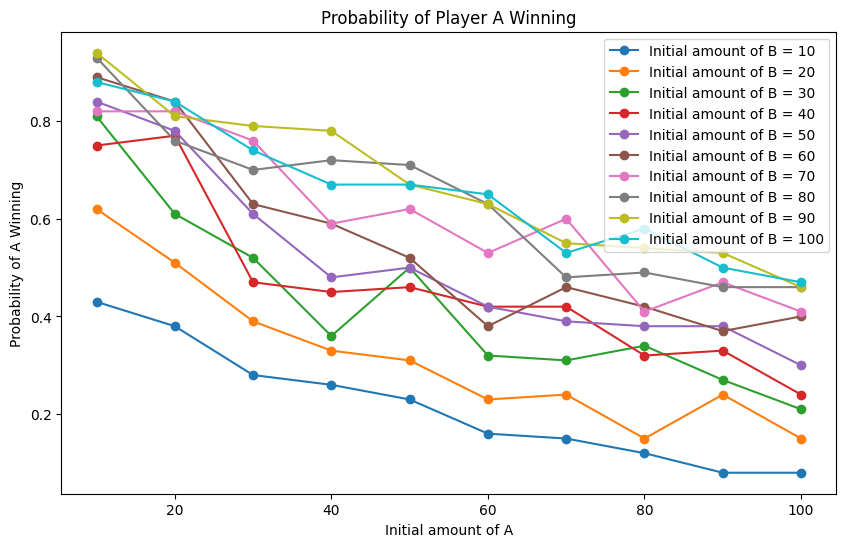

In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_gamblers_ruin(a, b, num_simulations):
    wins_A = 0

    for _ in range(num_simulations):
        money_A = a
        money_B = b

        while money_A > 0 and money_B > 0:
            if random.random() < 0.5:
                money_A += 1
                money_B -= 1
            else:
                money_A -= 1
                money_B += 1

        if money_A == 0:
            wins_A += 1

    return wins_A / num_simulations

def generate_probability_graph(start_a, end_a, step_a, start_b, end_b, step_b):
    a_values = list(range(start_a, end_a + step_a, step_a))
    b_values = list(range(start_b, end_b + step_b, step_b))

    plt.figure(figsize=(10, 6))

    for b in b_values:
        probabilities = []
        for a in a_values:
            probability = simulate_gamblers_ruin(a, b, num_simulations)
            probabilities.append(probability)
        plt.plot(a_values, probabilities, label=f'Initial amount of B = {b}', marker='o')

    plt.title('Probability of Player A Winning')
    plt.xlabel('Initial amount of A')
    plt.ylabel('Probability of A Winning')
    plt.legend()
    plt.show()

# Set the range for initial values of a and b
start_a, end_a, step_a = 10, 100, 10
start_b, end_b, step_b = 10, 100, 10

num_simulations = 100  # Number of simulations

generate_probability_graph(start_a, end_a, step_a, start_b, end_b, step_b)

**Analytical Approach:**

*i=the different strategies*

*a=probability of A winning*

*b=probability of B winning*

$
f(i)=Probability$(A wins|strategy i)

Recurrence Relation:
$
f(i)=\frac{1}{2}*f(i+1)+\frac{1}{2}*f(i-1)
$

Simplified Recurrence Relation:
$
2*f(i)=f(i+1)+f(i-1)
$

Initial Conditions:
$
f(a)=1,
$
$
f(-b)=0
$

Due to Initial conditions:
$
2*f(a)=f(a+1)+f(a-1)
$

Substituting
$
f(a)=1,
$
Then
$2=f(a+1)+f(a-1)$

Substituting
$
f(b)=0,
$
Then
$0=f(-b+1)+f(b-1)$

Solving this system of equations:


Final Solution:
$
f(i)=\frac{a}{a+b}
$

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

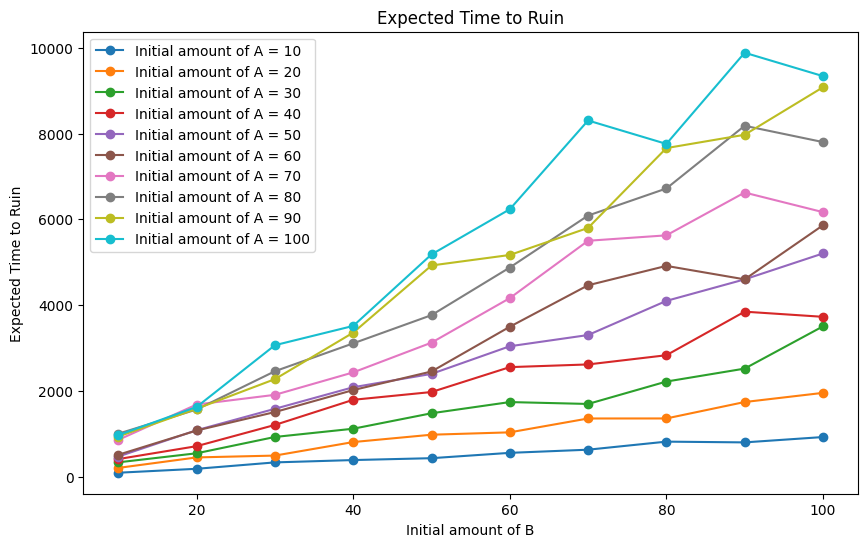

In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_gamblers_ruin_with_time(a, b, num_simulations):
    times_to_ruin = []

    for _ in range(num_simulations):
        money_A = a
        money_B = b
        games_played = 0

        while money_A > 0 and money_B > 0:
            games_played += 1
            if random.random() < 0.5:
                money_A += 1
                money_B -= 1
            else:
                money_A -= 1
                money_B += 1

        times_to_ruin.append(games_played)

    return sum(times_to_ruin) / num_simulations

def generate_expected_time_graph(start_a, end_a, step_a, start_b, end_b, step_b):
    a_values = list(range(start_a, end_a + step_a, step_a))
    b_values = list(range(start_b, end_b + step_b, step_b))

    plt.figure(figsize=(10, 6))

    for a in a_values:
        expected_times = []
        for b in b_values:
            expected_time = simulate_gamblers_ruin_with_time(a, b, num_simulations)
            expected_times.append(expected_time)
        plt.plot(b_values, expected_times, label=f'Initial amount of A = {a}', marker='o')

    plt.title('Expected Time to Ruin')
    plt.xlabel('Initial amount of B')
    plt.ylabel('Expected Time to Ruin')
    plt.legend()
    plt.show()

# Set the range for initial values of a and b
start_a, end_a, step_a = 10, 100, 10
start_b, end_b, step_b = 10, 100, 10

num_simulations = 100  # Number of simulations

generate_expected_time_graph(start_a, end_a, step_a, start_b, end_b, step_b)

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [ ]:
import numpy as np
import scipy.stats as stats

# Parameters for exponential distribution
rate_parameter = 0.5
mean_time = 1 / rate_parameter  # Mean time to complete the assignment

num_simulations = 100
expected_friends_needed = []

for _ in range(num_simulations):
    friends_times = np.random.exponential(scale=mean_time, size=1000)  # Simulate times for 1000 friends
    your_time = np.random.exponential(scale=mean_time)  # Simulate your assignment time

    # Find the number of friends needed to find someone with a longer completion time
    friends_needed = np.argmax(friends_times > your_time) + 1
    expected_friends_needed.append(friends_needed)

# Calculate the mean and standard error of the expected number of friends needed
mean_expected_friends = np.mean(expected_friends_needed)
std_error = np.std(expected_friends_needed, ddof=1) / np.sqrt(num_simulations)

# Calculate the 95% confidence interval
conf_interval = stats.t.interval(0.95, df=num_simulations - 1, loc=mean_expected_friends, scale=std_error)

print("Expected Number of Friends Needed:", mean_expected_friends)
print("95% Confidence Interval:", conf_interval)


Expected Number of Friends Needed: 5.14
95% Confidence Interval: (3.1573830927362327, 7.122616907263767)


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


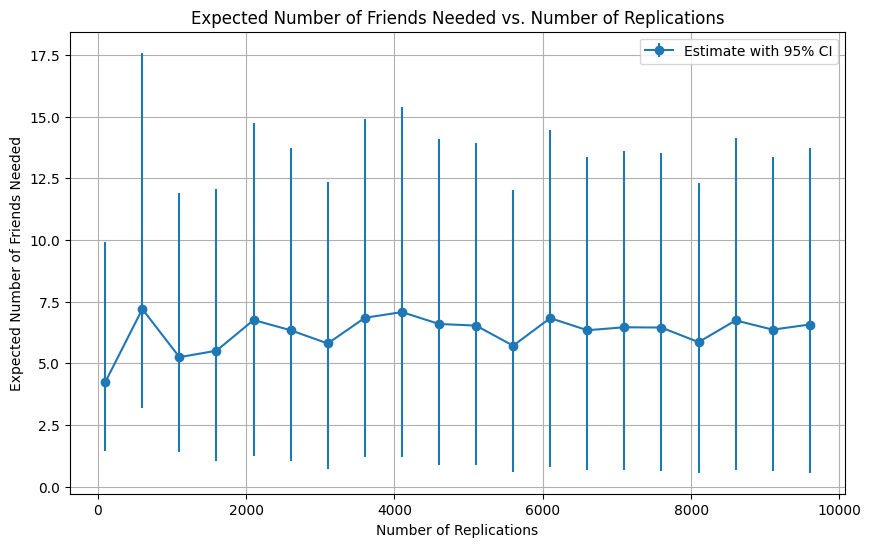

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for exponential distribution
rate_parameter = 0.5
mean_time = 1 / rate_parameter  # Mean time to complete the assignment

# Define the range of replications
replications_range = list(range(100, 10001, 500))

mean_expected_friends_list = []
conf_intervals_list = []

for num_simulations in replications_range:
    expected_friends_needed = []

    for _ in range(num_simulations):
        friends_times = np.random.exponential(scale=mean_time, size=1000)  # Simulate times for 1000 friends
        your_time = np.random.exponential(scale=mean_time)  # Simulate your assignment time

        # Find the number of friends needed to find someone with a longer completion time
        friends_needed = np.argmax(friends_times > your_time) + 1
        expected_friends_needed.append(friends_needed)

    # Calculate the mean and standard error of the expected number of friends needed
    mean_expected_friends = np.mean(expected_friends_needed)
    std_error = np.std(expected_friends_needed, ddof=1) / np.sqrt(num_simulations)

    # Calculate the 95% confidence interval
    conf_interval = stats.t.interval(0.95, df=num_simulations - 1, loc=mean_expected_friends, scale=std_error)

    mean_expected_friends_list.append(mean_expected_friends)
    conf_intervals_list.append(conf_interval)

# Plot the estimates and 95% CIs
plt.figure(figsize=(10, 6))
plt.errorbar(replications_range, mean_expected_friends_list, yerr=np.array(conf_intervals_list).T, fmt='-o', label='Estimate with 95% CI')
plt.xlabel('Number of Replications')
plt.ylabel('Expected Number of Friends Needed')
plt.title('Expected Number of Friends Needed vs. Number of Replications')
plt.grid(True)
plt.legend()
plt.show()


___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

Yes, the result was surprising because we'd expect the confidence intervals to decrease in size when we increase the number of replications, but the intervals remain at about the same size

To start off, we will create the decision variable $X_i$ which is binary and takes the value 1 if the ith person is the 1st person to score higher than our score and 0 otherwise. We will denote our score as $T_0$.

$$
	X_i =
	\begin{cases}
		1, \text{ if $T_i \text{ is the first score} > T_0$ } \\
		0, \text{ other } \\
	\end{cases}
	$$

Q = # total number of surveys
$$
Q = \sum_{i=1}^{∞} i * X_i
$$

$$
E(Q) = \sum_{i=1}^{∞} i * E(X_i)
$$

In order ot find E($X_i$), we need to find the probability that $T_i > T_0$.

To do this, we will start by ordering $T_1, T_2, ..., T_{i-1}$, in front of $T_0$ and $T_i$. We don't need to worry about any scores after $T_i$ because those $X_i$ values will all = 0. We don't know the order of our friends scores before ours, so there are (i+1)! ways to organize $T_1$ through $T_{i}$. Next, there are (i-1)! number of different combinations where $T_i$ is the first score that is greater than our own.

$P(T_i > T_0) = \frac{(i-1)!}{(i+1)!} = \frac{1}{i(i+1)}$

So now we plug this into our E(Q):

$$
E(Q) = \sum_{i=1}^{∞} i * E(X_i) = \sum_{i=1}^{\infty} i * \frac{1}{i(i+1)} = \sum_{i=2}^{\infty} \frac{1}{i} = \infty
$$

Therefore, the expected number of surveys until one is larger than ours is infinite.